# 9. Dimensionality Reduction

In [1]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [2]:
adata = sc.read(
    '../../0_outs/sample-SRR15058452/SRR15058452_feature_selection.h5ad'
)

In [3]:
adata.X = adata.layers["log1p_norm"]

# 9.1. PCA

In [4]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

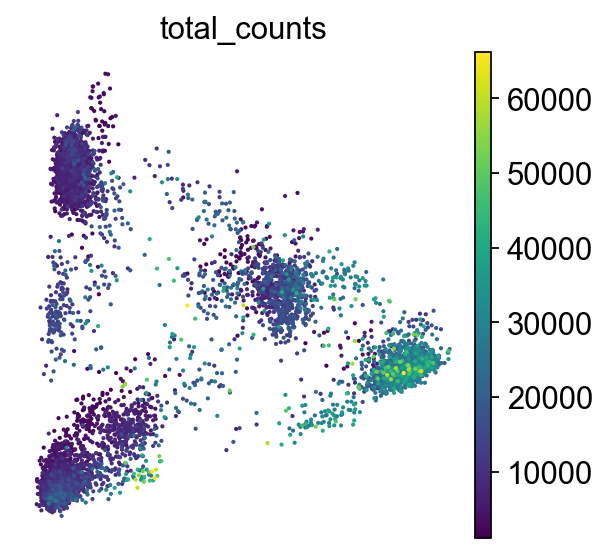

In [5]:
sc.pl.pca_scatter(adata, color="total_counts")

# 9.2. t-SNE

In [6]:
sc.tl.tsne(adata, use_rep="X_pca")

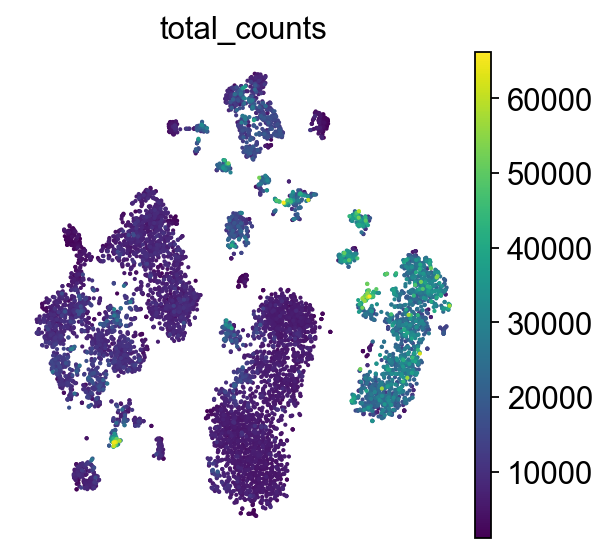

In [7]:
sc.pl.tsne(adata, color="total_counts")

# 9.3. UMAP

In [8]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/adrian/opt/anaconda3/envs/mamba/envs/simpleaf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


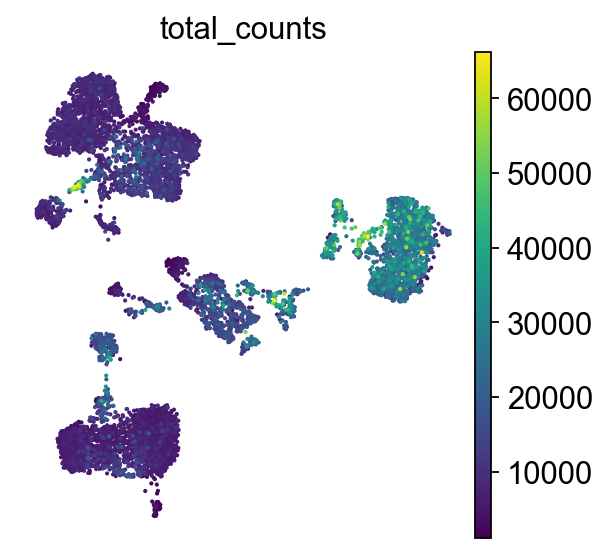

In [9]:
sc.pl.umap(adata, color="total_counts")

# 9.4. Inspecting quality control metrics

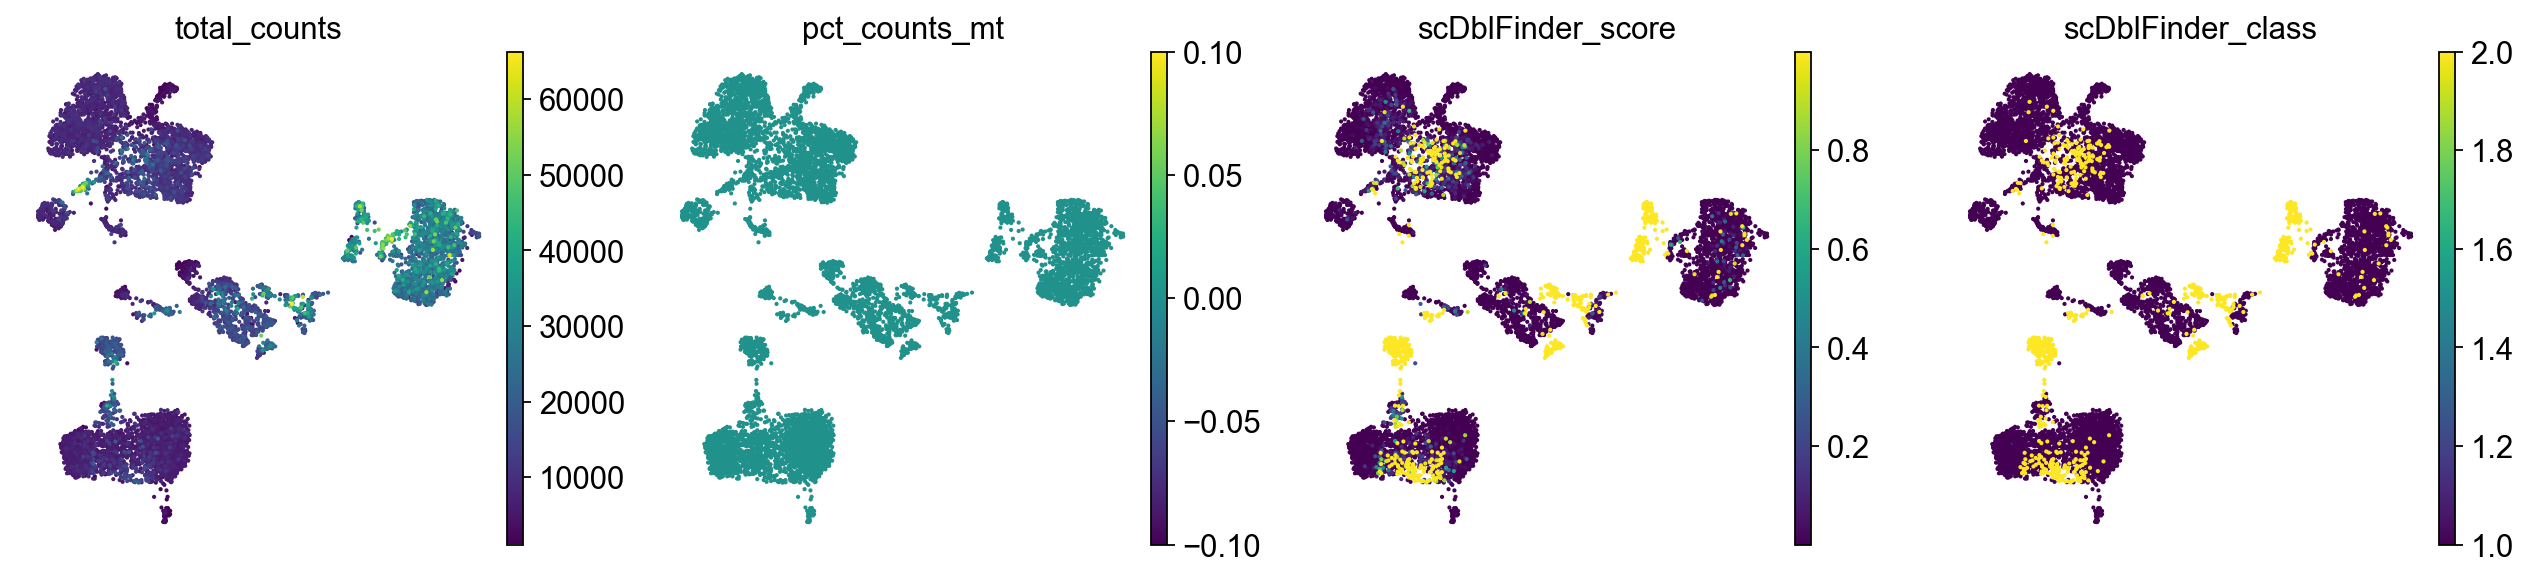

In [10]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"],
)

In [11]:
adata.write("../../0_outs/sample-SRR15058452/SRR15058452_dimensionality_reduction.h5ad")